In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

def predict(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

    img_resized = cv2.resize(img, (224, 224))
    img_array =  np.expand_dims(img_resized, axis=0)/255.

    class_names = ['A', 'BA', 'CA', 'DA', 'GA', 'GHA', 'HA', 'JA', 'KA', 'LA', 'MA', 'NA', 'NGA', 'NYA', 'PA', 'RA', 'SA', 'TA', 'WA', 'YA']

    model_path = "../saved_models/Induk aksara/resnet50_finetune_m.hdf5"
    final_model = load_model(model_path)
    pred = final_model.predict(img_array)

    top_pred_indices = pred.argsort()[0][-5:][::-1]
    top_pred_probabilities = pred[0][top_pred_indices]
    
    predicted_classes = np.argmax(pred, axis=1)
    predicted_classes = class_names[predicted_classes[0]]

    print("\nPredicted Class:", predicted_classes)

    print("\nPrediction Probabilities:")
    for class_idx, probability in zip(top_pred_indices, top_pred_probabilities):
        class_name = class_names[class_idx]
        print(f"{probability * 100:6.2f}% : {class_name}")

predict(image_path="../dataset/blind dataset/bar_04.png")

# Back up

In [66]:
# def predict(image_path, model_name):
#     # Load class names
#     class_names =[ {
#         'atas': ['AN', 'ANG', 'AR', 'BAN', 'BANG', 'BAR', 'BE', 'BEE', 'BI', 'CAN', 'CANG', 'CAR', 'CE', 'CEE', 'CI', 'DAN', 'DANG', 'DAR', 'DE', 'DEE', 'DI', 'E', 'EE', 'GAN', 'GANG', 'GAR', 'GE', 'GEE', 'GHAN', 'GHANG', 'GHAR', 'GHE', 'GHEE', 'GHI', 'GI', 'HAN', 'HANG', 'HAR', 'HE', 'HEE', 'HI', 'I', 'JAN', 'JANG', 'JAR', 'JE', 'JEE', 'JI', 'KAN', 'KANG', 'KAR', 'KE', 'KEE', 'KI', 'LAN', 'LANG', 'LAR', 'LE', 'LEE', 'LI', 'MAN', 'MANG', 'MAR', 'ME', 'MEE', 'MI', 'NAN', 'NANG', 'NAR', 'NE', 'NEE', 'NGAN', 'NGANG', 'NGAR', 'NGE', 'NGEE', 'NGI', 'NI', 'NYAN', 'NYANG', 'NYAR', 'NYE', 'NYEE', 'NYI', 'PAN', 'PANG', 'PAR', 'PE', 'PEE', 'PI', 'RAN', 'RANG', 'RAR', 'RE', 'REE', 'RI', 'SAN', 'SANG', 'SAR', 'SE', 'SEE', 'SI', 'TAN', 'TANG', 'TAR', 'TE', 'TEE', 'TI', 'WAN', 'WANG', 'WAR', 'WE', 'WEE', 'WI', 'YAN', 'YANG', 'YAR', 'YE', 'YEE', 'YI'],
#         'samping': ['AH', 'AI', 'B', 'BAH', 'BAI', 'C', 'CAH', 'CAI', 'D', 'DAH', 'DAI', 'G', 'GAH', 'GAI', 'GH', 'GHAH', 'GHAI', 'H', 'HAH', 'HAI', 'J', 'JAH', 'JAI', 'K', 'KAH', 'KAI', 'L', 'LAH', 'LAI', 'M', 'MAH', 'MAI', 'N', 'NAH', 'NAI', 'NG', 'NGAH', 'NGAI', 'NY', 'NYAH', 'NYAI', 'P', 'PAH', 'PAI', 'R', 'RAH', 'RAI', 'S', 'SAH', 'SAI', 'T', 'TAH', 'TAI', 'W', 'WAH', 'WAI', 'Y', 'YAH', 'YAI'],
#         'bawah': ['AU', 'BAU', 'BO', 'BU', 'CAU', 'CO', 'CU', 'DAU', 'DO', 'DU', 'GAU', 'GHAU', 'GHO', 'GHU', 'GO', 'GU', 'HAU', 'HO', 'HU', 'JAU', 'JO', 'JU', 'KAU', 'KO', 'KU', 'LAU', 'LO', 'LU', 'MAU', 'MO', 'MU', 'NAU', 'NGAU', 'NGO', 'NGU', 'NO', 'NU', 'NYAU', 'NYO', 'NYU', 'O', 'PAU', 'PO', 'PU', 'RAU', 'RO', 'RU', 'SAU', 'SO', 'SU', 'TAU', 'TO', 'TU', 'U', 'WAU', 'WO', 'WU', 'YAU', 'YO', 'YU']
#     }]

#     models = {}

#     for cat in class_names.keys():
#         model_path = f"../saved_models/Induk anak huruf di {cat}/{model_name}.hdf5"
#         models[cat] = load_model(model_path)

#     # Load and resize the image using OpenCV.
#     img = cv2.imread(image_path, cv2.IMREAD_COLOR)
#     img_resized = cv2.resize(img, (224, 224))

#     # Plot the image.
#     plt.imshow(img_resized)
#     plt.show()

#     # Convert the image to a numpy-array with the proper shape.
#     img_array =  np.expand_dims(img_resized, axis=0) / 255.

#     results = {}

#     for cat, model in models.items():
#         # Predict the image.
#         pred = model.predict(img_array)
#         top_pred_indices = pred.argsort()[0][-3:][::-1]
#         top_pred_prob = pred[0][top_pred_indices]
#         top_pred_class = [class_names[cat][i] for i in top_pred_indices]

#         for class_name, probability in zip(top_pred_class, top_pred_prob):
#             results[class_name] = probability

#     predicted_class = max(results, key=results.get)
#     print("Predicted Class:", predicted_class)

#     # Sort the results by probabilities in descending order
#     sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

#     # Print the top 5 predictions and their probabilities
#     print("Predictions Probabilities:")
#     for i, (class_name, probability) in enumerate(sorted_results[:5], 1):
#         print(f"{i}. {class_name}: {probability * 100:.2f}%")

#     # print("=============================")
#     # for key, value in results.items():
#     #     print(f"{key}: {value * 100:.2f}%")

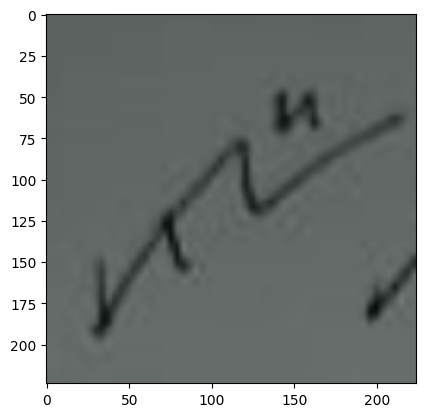

1/1 [==============================] - 1s 930ms/step
Predicted Class: AH
Predictions Probabilities:
1. AH: 100.00%
2. AU: 99.98%
3. AR: 98.03%
4. AN: 1.97%
5. JAU: 0.02%


In [73]:
# Define image path
image_path = "../dataset/blind dataset/ar_04.png"

# Predict for all categories
predict(image_path, 'resnet50_finetune_m')